In [211]:
import xgboost
import sklearn
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [212]:
mnist = load_digits()
X = mnist['data']
y = mnist["target"]
X_train, X_test, y_train, y_test  = train_test_split(X,y)

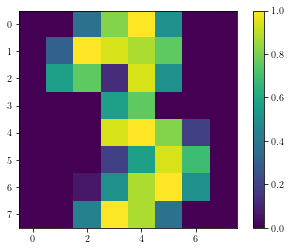

In [213]:

# Normalize
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)

# same visualisation as before

plt.figure()
plt.imshow(X_train[0].reshape(8,8))
plt.colorbar()
plt.grid(False)
plt.show()
# print(train_images[0])

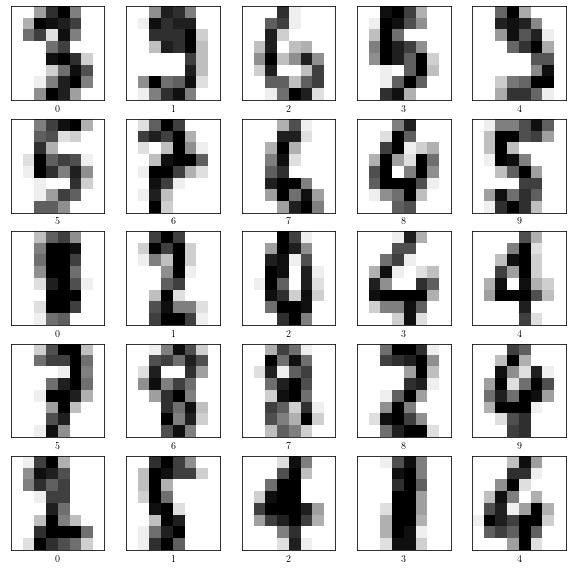

In [214]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(8,8), cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()



In [215]:
xgbc = xgboost.XGBClassifier()
xgbc2 = xgboost.XGBClassifier(n_estimators=10, min_child_weight=1)
xgbc3 = xgboost.XGBClassifier(n_estimators=500, alpha=0.1)

In [216]:
xgbc.fit(X_train,y_train, verbose=0)
xgbc2.fit(X_train,y_train, verbose=0)
xgbc3.fit(X_train,y_train, verbose=0)

/Users/felixquinque/opt/anaconda3/envs/main_env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:24:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=10,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0.100000001, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [217]:
# preds = xgbc.predict(X_test)
predict_probs = xgbc.predict_proba(X_test)
predict_probs2 = xgbc2.predict_proba(X_test)
predict_probs3 = xgbc3.predict_proba(X_test)

# Helper Functions

In [218]:
def make_confusion_matrix(cf: np.array,
                          group_names: list = None,
                          categories: str = 'auto',
                          count: bool = True,
                          percent: bool = True,
                          cbar: bool = True,
                          xyticks: bool = True,
                          xyplotlabels: bool = True,
                          sum_stats: bool = True,
                          figsize: tuple = None,
                          cmap: str = 'Blues',
                          title: str = "Confusion Matrix"):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    rc('text', usetex=True)
    rc('font', family='serif')
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        # figsize = plt.rcParams.get('figure.figsize')
        figsize = (cf.shape[0]+2, cf.shape[0]+2) # increase plot size if there are many classes

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel(r'True label', fontsize=10+cf.shape[0])
        plt.xlabel('Predicted label' + stats_text,fontsize=10+cf.shape[0])
    else:
        plt.xlabel(stats_text,fontsize=10+cf.shape[0])
    
    if title:
        plt.title(f"{title} Confusion Matrix", fontsize=10+cf.shape[0])
plt.show()

# .

In [ ]:
def make_pred_histogram(probs: list[list], title: str="Histogram", fig_size: tuple[int] = (10,10)) -> None:
    """
    This function plots a histogram of the prediction probabilities of a classifier.
    probs (list[list]):     a 2D array/list of the predictions made by the model
    title (str):            the plot title
    fig_size (tuple[int]):  a tuple describing the plot size of the histogram
    
    Plots the histogram and does not return anything.
    """
    rc('text', usetex=True)
    rc('font', family='serif')
    _ = plt.figure(figsize=fig_size)
    _ = plt.hist([p for ps in probs for p in ps], bins=max(10,int(len(res)/100)))
    plt.title(f"{title} Histogram", fontsize=10+fig_size[0])
    plt.xlabel("Prediction Probability", fontsize=10+fig_size[0])
    plt.ylabel("Count", fontsize=10+fig_size[0])
    plt.show()

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import rc
def get_metrics(y_test: list[int], predictions: list[list], model_names = list[str], class_names: list[str] = None) -> None:
    prediction_probabilities = []
    for idx,preds in enumerate(predictions):
        if np.max(preds) > 1:
            pred_probs = None
        else:
            disc_preds = np.argmax(predict_probs,axis=1)
            prediction_probabilities.append(preds)
            make_pred_histogram(preds, model_names[idx])    

        conf_mat = confusion_matrix(disc_preds,y_test)
        make_confusion_matrix(conf_mat, title=model_names[idx])

        
    if len(prediction_probabilities) == len(predictions):
        import metriculous
        metriculous.compare_classifiers(
            ground_truth=y_test,
            model_predictions=prediction_probabilities,
            model_names=model_names,
            class_names=class_names,
            one_vs_all_figures=True
        ).display()

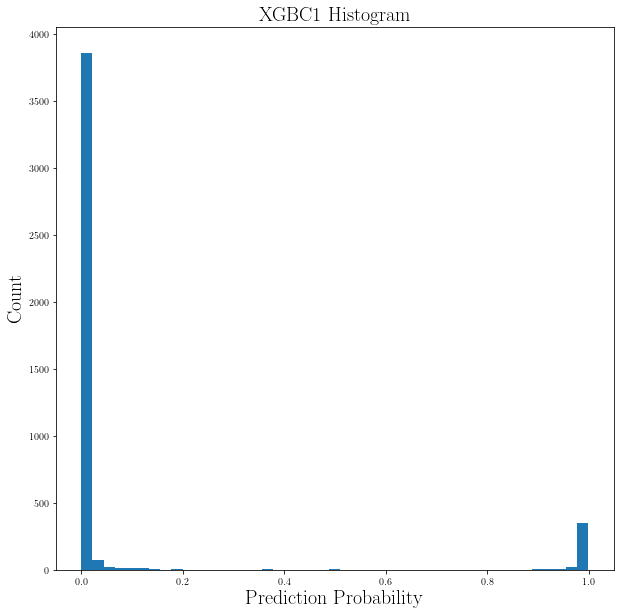

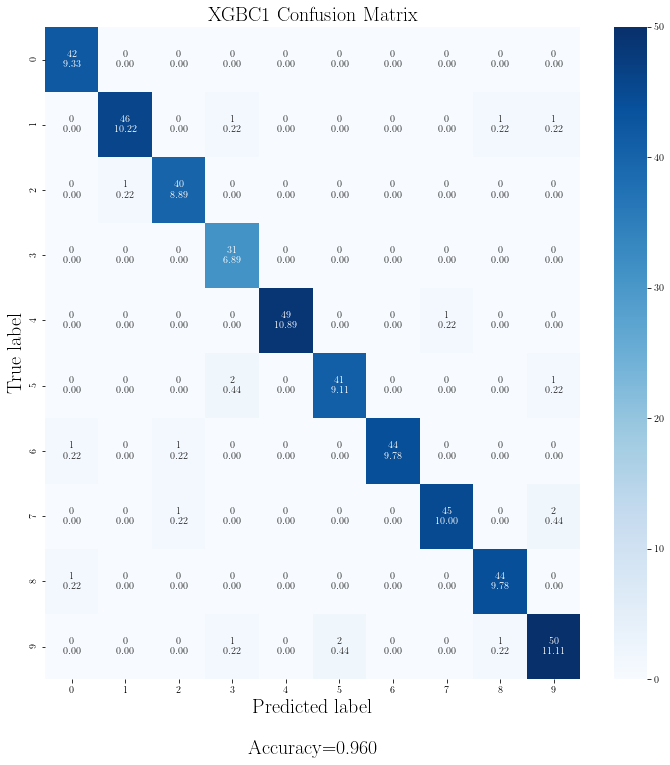

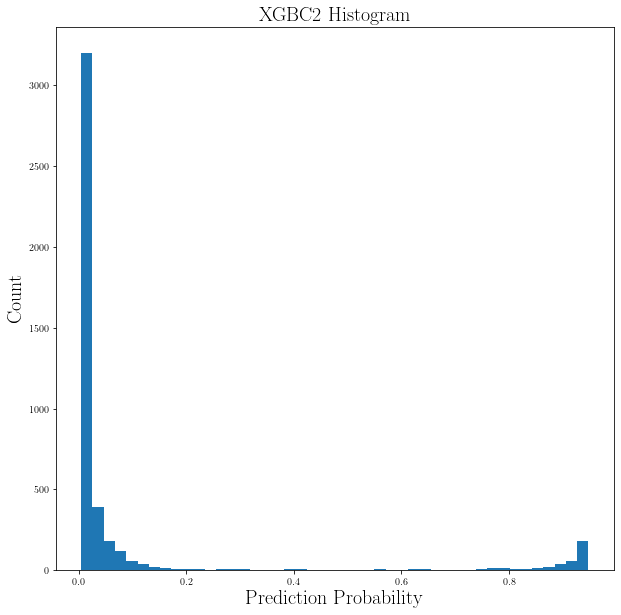

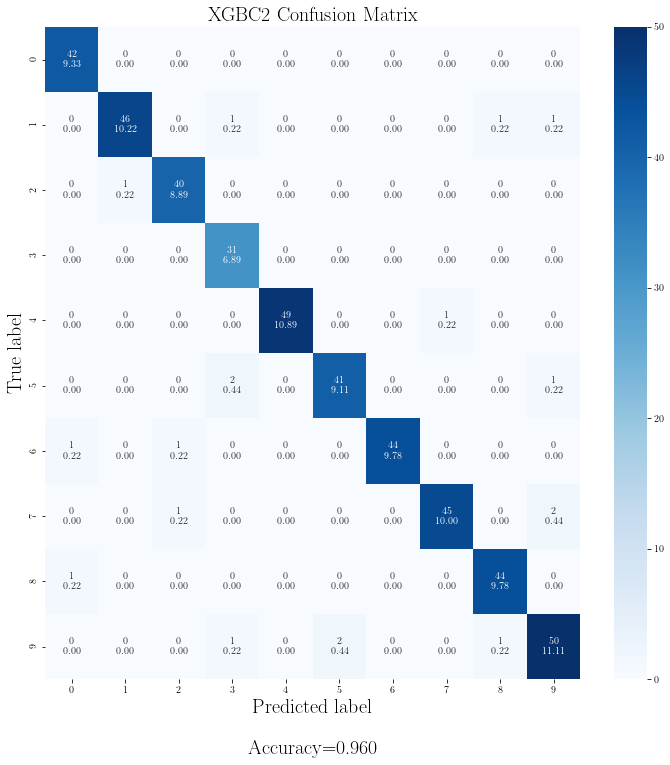

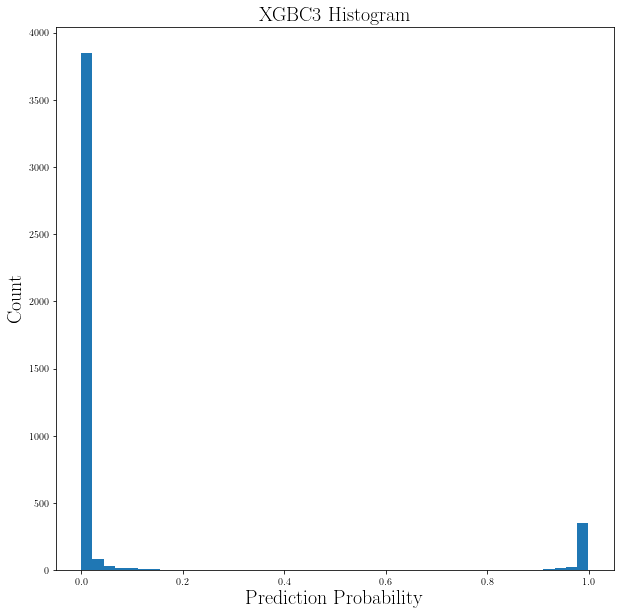

,Quantity,XGBC1,XGBC2,XGBC3
0,Accuracy,0.960,0.938,0.962
1,ROC AUC Macro Average,0.999,0.998,0.999
2,ROC AUC Micro Average,0.999,0.998,0.999
3,F1-Score Macro Average,0.960,0.938,0.962
4,F1-Score Micro Average,0.960,0.938,0.962
5,ROC AUC class_0 vs Rest,1.000,0.998,1.000
6,ROC AUC class_1 vs Rest,1.000,1.000,1.000
7,ROC AUC class_2 vs Rest,1.000,0.996,1.000
8,ROC AUC class_3 vs Rest,1.000,0.999,1.000
9,ROC AUC class_4 vs Rest,1.000,1.000,1.000


Loading BokehJS ...

In [221]:
get_metrics(y_test, [predict_probs, predict_probs2, predict_probs3], ["XGBC1", "XGBC2", "XGBC3"])